<a href="https://colab.research.google.com/github/Tissyjohnson/DSA_Class_Activities/blob/main/Price_Quality_Breed_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install scikit-learn==1.7.2 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.2
    Uninstalling joblib-1.5.2:
      Successfully uninstalled joblib-1.5.2
  Attempting uninstall: scipy
    Found exis

In [4]:
import sklearn
print(sklearn.__version__)

1.7.2


In [21]:
!pip uninstall -y scikit-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [3]:
# 🧠 MILK QUALITY, PRICE (RATE), & BREED PREDICTION PIPELINE + ADVANCED EDA
# ===============================================================
import os, warnings, math
warnings.filterwarnings("ignore")
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns, joblib
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor,
    RandomForestClassifier, GradientBoostingClassifier,AdaBoostRegressor
)
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, f1_score
)
from sklearn.cluster import KMeans

sns.set(style="whitegrid", palette="viridis")
plt.rcParams["figure.figsize"] = (9, 4)


In [5]:
os.makedirs("milkapp/ml_models", exist_ok=True)

In [6]:
df = pd.read_csv("/content/MILMA_with_Breed_Assignment.csv")

In [7]:
# ---------- PARAMETERS ----------
RND = 42
RF_EST = 100
GB_EST = 100

In [8]:
# ---------- Column groups ----------
milk_cols = ["FAT","SNF","CLR","LITRE","RATE","AMOUNT","Rainfall_mm","Temperature_C","Humidity_%"]
breed_cols = ["Breed_Name","Avg_Milk_Yield_L_per_day","Avg_Fat_%","Avg_SNF_%","Typical_Cost",
              "Climate_Tolerance","Feed_Needs","Disease_Resistance_Level"]

In [9]:
df.head()

,FARMER ID,NAME,FAT,CLR,SNF,LITRE,RATE,AMOUNT,Date,TimeOfDay,...,Breed_Name,Origin_State/Country,Avg_Milk_Yield_L_per_day,Avg_Fat_%,Avg_SNF_%,Climate_Tolerance,Feed_Needs,Disease_Resistance_Level,Typical_Cost (â¹),Use_Type
0,1913,PUSHPAJA DEVI,4.5,25.0,7.6,4.1,42.47,174.13,22-02-2022,Evening,...,HF Cross,Crossbreed,16.0,3.8,8.3,Moderate,High,Medium,110000,Milk
1,1917,DHARMAKUMARAN,4.7,27.0,8.2,15.7,44.72,702.05,03-04-2022,Evening,...,HF Cross,Crossbreed,16.0,3.8,8.3,Moderate,High,Medium,110000,Milk
2,1937,RAJEELA BEEVI,4,27.0,8.2,5,15.26,226.3,23-09-2024,Evening,...,HF Cross,Crossbreed,16.0,3.8,8.3,Moderate,High,Medium,110000,Milk
3,1666,BINDUKUMARI,3.8,28.0,8.9,15.5,42.12,652.86,04-02-2024,Morning,...,Vechur,Kerala,2.5,5.0,9.0,Hot & Humid,Low,Very High,50000,Milk
4,1715,M. ABDUAL VAHAB,4.8,27.0,8.2,7.5,45.26,339.45,18-07-2023,Morning,...,HF Cross,Crossbreed,16.0,3.8,8.3,Moderate,High,Medium,110000,Milk


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15981 entries, 0 to 15980
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FARMER ID                 15981 non-null  int64  
 1   NAME                      15981 non-null  object 
 2   FAT                       15981 non-null  object 
 3   CLR                       15981 non-null  float64
 4   SNF                       15981 non-null  float64
 5   LITRE                     15981 non-null  object 
 6   RATE                      15981 non-null  float64
 7   AMOUNT                    15981 non-null  object 
 8   Date                      15000 non-null  object 
 9   TimeOfDay                 15000 non-null  object 
 10  Rainfall_mm               15000 non-null  float64
 11  Temperature_C             15000 non-null  float64
 12  Humidity_%                15000 non-null  float64
 13  Location                  15000 non-null  object 
 14  Breed 

In [11]:
# 🧮 Convert 'LITRE' and 'RATE' columns to numeric safely
df["LITRE"] = pd.to_numeric(df["LITRE"], errors="coerce")
df["AMOUNT"] = pd.to_numeric(df["AMOUNT"], errors="coerce")

# Fill any missing (NaN) values with median
df["LITRE"].fillna(df["LITRE"].median(), inplace=True)
df["AMOUNT"].fillna(df["AMOUNT"].median(), inplace=True)

# ✅ Verify dtypes
print(df[["LITRE", "AMOUNT"]].dtypes)


LITRE     float64
AMOUNT    float64
dtype: object


In [12]:
# 🧩 STEP 1: EXPLORATORY DATA ANALYSIS (EDA)
# ===============================================================
print("\n🔍 EDA — Dataset Overview")
print(f"Shape: {df.shape}")
print("\nColumns:", list(df.columns))
print("\nMissing values:\n", df.isna().sum())

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns



🔍 EDA — Dataset Overview
Shape: (15981, 25)

Columns: ['FARMER ID', 'NAME', 'FAT', 'CLR', 'SNF', 'LITRE', 'RATE', 'AMOUNT', 'Date', 'TimeOfDay', 'Rainfall_mm', 'Temperature_C', 'Humidity_%', 'Location', 'Breed ID', 'Breed_Name', 'Origin_State/Country', 'Avg_Milk_Yield_L_per_day', 'Avg_Fat_%', 'Avg_SNF_%', 'Climate_Tolerance', 'Feed_Needs', 'Disease_Resistance_Level', 'Typical_Cost (â\x82¹)', 'Use_Type']

Missing values:
 FARMER ID                     0
NAME                          0
FAT                           0
CLR                           0
SNF                           0
LITRE                         0
RATE                          0
AMOUNT                        0
Date                        981
TimeOfDay                   981
Rainfall_mm                 981
Temperature_C               981
Humidity_%                  981
Location                    981
Breed ID                      0
Breed_Name                    0
Origin_State/Country          0
Avg_Milk_Yield_L_per_day      

In [13]:
# ---------- Handle Missing ----------
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

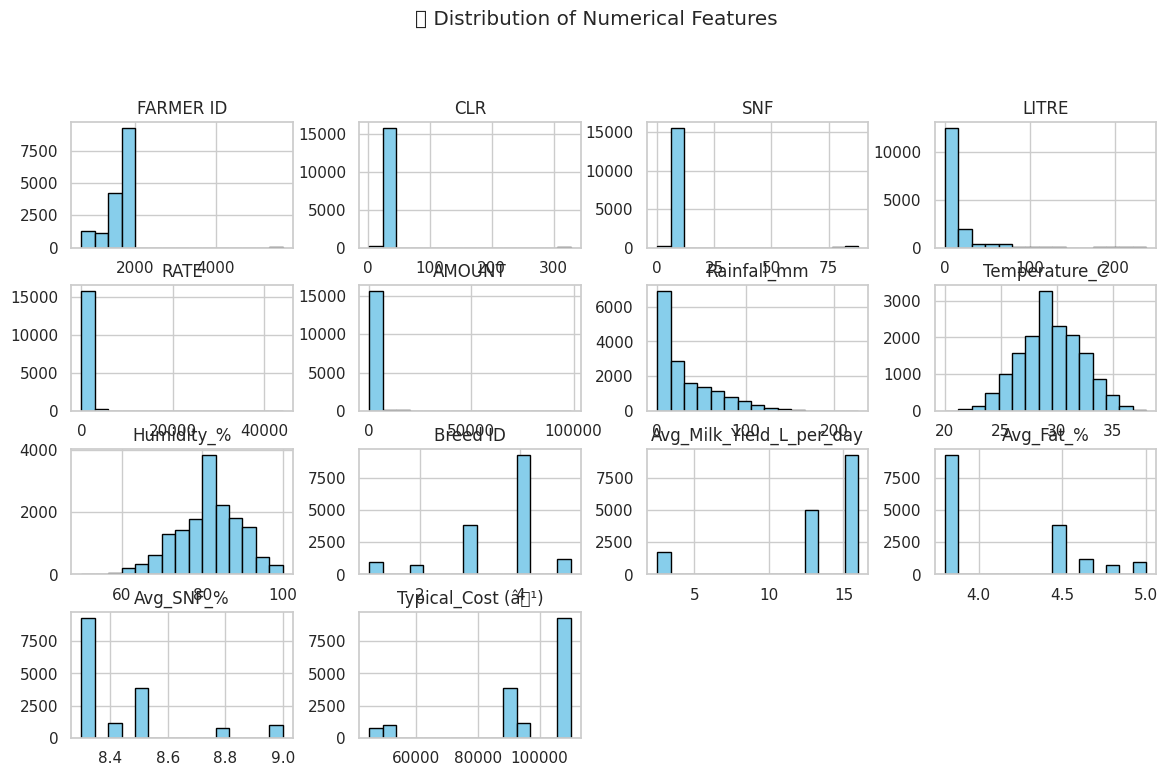

In [14]:
# ---------- Distribution Plots ----------
df[num_cols].hist(bins=15, figsize=(14, 8), color='skyblue', edgecolor='black')
plt.suptitle("📊 Distribution of Numerical Features", y=1.02)
plt.show()

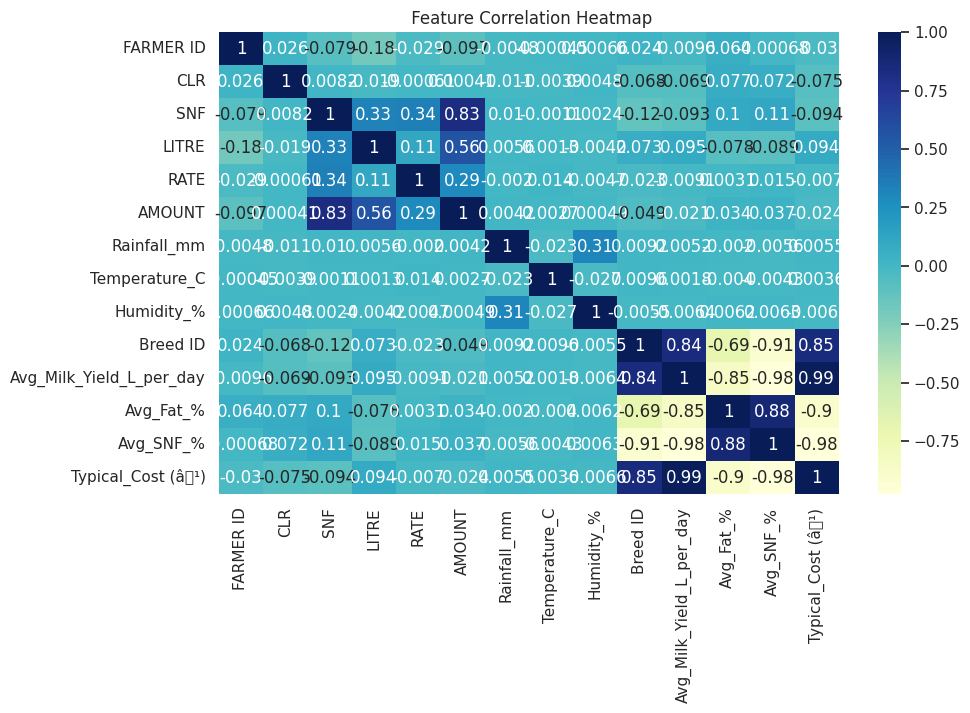

In [15]:
# ---------- Correlation ----------
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="YlGnBu")
plt.title(" Feature Correlation Heatmap")
plt.show()

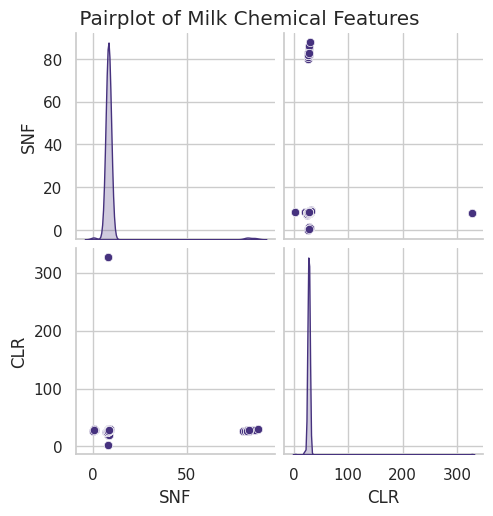

In [16]:
# ---------- Pairplot ----------
chem_feats = [c for c in ["FAT", "SNF", "CLR"] if c in df.columns]
if len(chem_feats) >= 2:
    sns.pairplot(df[chem_feats], diag_kind="kde")
    plt.suptitle(" Pairplot of Milk Chemical Features", y=1.02)
    plt.show()



🚨 Removing Outliers using IQR...
SNF       : removed 427 outliers
CLR       : removed 207 outliers
RATE      : removed 542 outliers
AMOUNT    : removed 1330 outliers
LITRE     : removed 597 outliers
✅ New shape: (12878, 25)


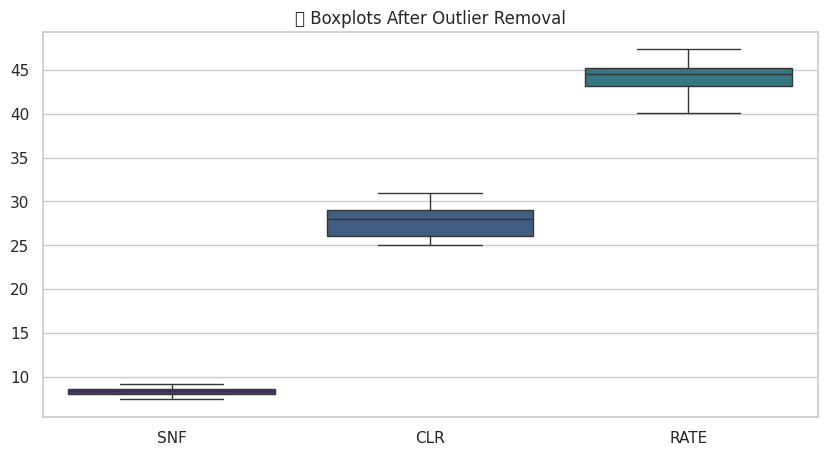

In [17]:
# 🚨 STEP 2: OUTLIER REMOVAL
# ===============================================================
def remove_outliers_iqr(df, cols):
    for col in cols:
        if df[col].dtype in [np.float64, np.int64]:
            Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            before = len(df)
            df = df[(df[col] >= lower) & (df[col] <= upper)]
            after = len(df)
            print(f"{col:10s}: removed {before-after} outliers")
    return df

print("\n🚨 Removing Outliers using IQR...")
df = remove_outliers_iqr(df, ["FAT","SNF","CLR","RATE","AMOUNT","LITRE"])
print(f"✅ New shape: {df.shape}")

plt.figure(figsize=(10,5))
sns.boxplot(data=df[["FAT","SNF","CLR","RATE"]])
plt.title("📦 Boxplots After Outlier Removal")
plt.show()


✅ QUALITY CLUSTERING COMPLETE:
QUALITY
C    7095
B    5605
A     163
Name: count, dtype: int64


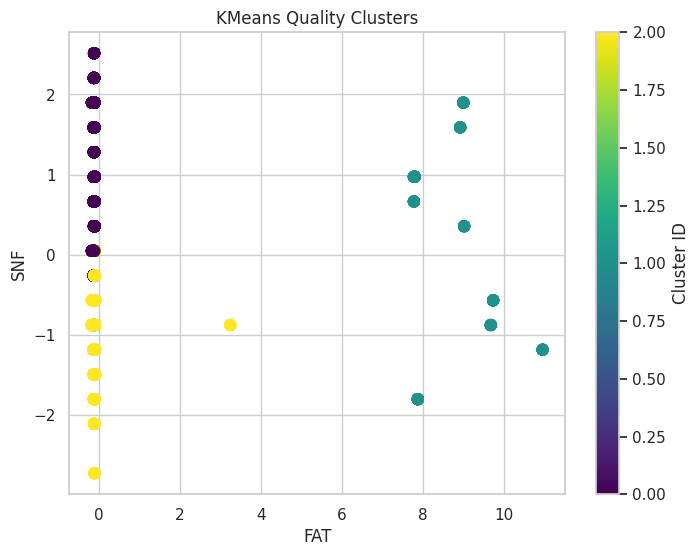

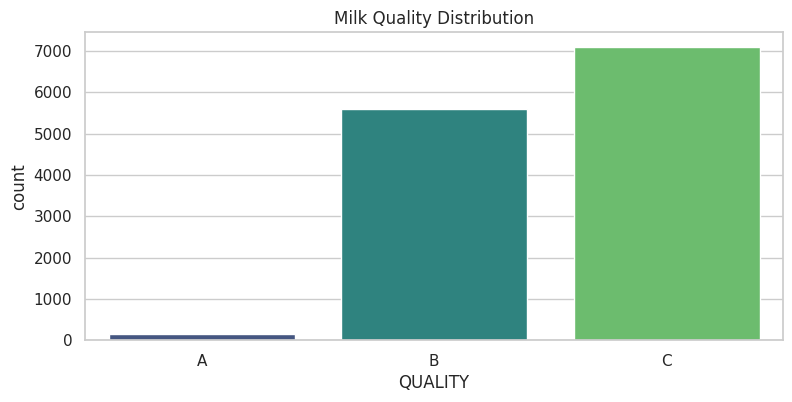

In [18]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# STEP 1: Select Features
# -----------------------------
chem_feats = [c for c in ["FAT", "SNF", "CLR"] if c in df.columns]
env_feats = [c for c in ["Rainfall_mm", "Temperature_C", "Humidity_%"] if c in df.columns]

features = chem_feats + env_feats

# Convert to numeric
for c in features:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=features)

# -----------------------------
# STEP 2: KMeans Clustering
# -----------------------------
if len(features) >= 2:
    Xk = df[features]
    Xk_scaled = StandardScaler().fit_transform(Xk)

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    df["QUALITY_CLUSTER"] = kmeans.fit_predict(Xk_scaled)

    # -----------------------------
    # STEP 3: Map clusters to grades
    # -----------------------------
    cluster_stats = df.groupby("QUALITY_CLUSTER")[chem_feats].median()

    # Safe scoring method
    if "FAT" in chem_feats and "SNF" in chem_feats:
        cluster_stats["score"] = cluster_stats["FAT"] + cluster_stats["SNF"]
    else:
        # If FAT or SNF missing → use mean of available chemical features
        cluster_stats["score"] = cluster_stats.mean(axis=1)

    cluster_order = cluster_stats.sort_values("score").index.tolist()

    grade_map = {cluster_order[0]: "C", cluster_order[1]: "B", cluster_order[2]: "A"}
    df["QUALITY"] = df["QUALITY_CLUSTER"].map(grade_map)

    df["Quality_Code"] = df["QUALITY"].map({"A": 2, "B": 1, "C": 0})

    # Save model
    joblib.dump(kmeans, "milkapp/ml_models/quality_kmeans_model.pkl")

    print("\n✅ QUALITY CLUSTERING COMPLETE:")
    print(df["QUALITY"].value_counts())

    # -----------------------------
    # STEP 4: Visualizations
    # -----------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(Xk_scaled[:,0], Xk_scaled[:,1], c=df["QUALITY_CLUSTER"], cmap="viridis", s=60)
    plt.title("KMeans Quality Clusters")
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.colorbar(label="Cluster ID")
    plt.show()

    sns.countplot(x="QUALITY", data=df, order=["A","B","C"], palette="viridis")
    plt.title("Milk Quality Distribution")
    plt.show()

else:
    print("⚠️ Not enough features for QUALITY clustering")



💰 Training PRICE models with QUALITY feature...
LinearRegression     | R²=0.3958 | RMSE=1.1322
Ridge                | R²=0.3961 | RMSE=1.1320
Lasso                | R²=-0.0001 | RMSE=1.4568
RandomForest         | R²=0.9907 | RMSE=0.1405
GradientBoosting     | R²=0.9490 | RMSE=0.3289


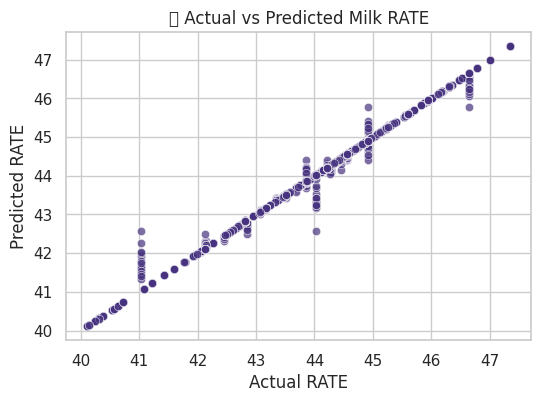

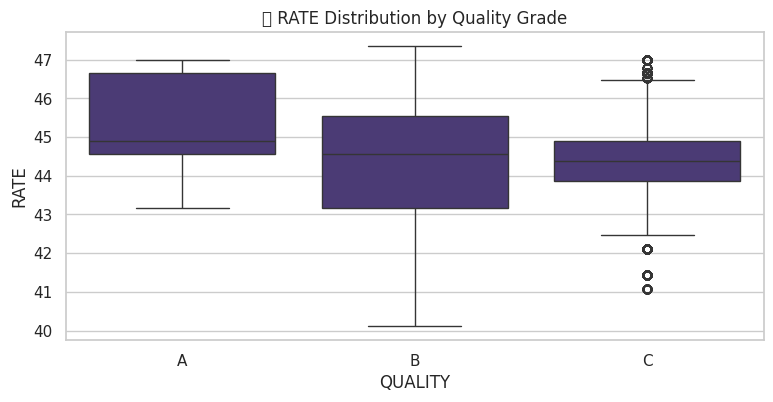

In [19]:
# 💰 STEP 4: PRICE (RATE) PREDICTION WITH QUALITY
# ===============================================================
print("\n💰 Training PRICE models with QUALITY feature...")

price_features = ["FAT","SNF","CLR","LITRE","Rainfall_mm","Temperature_C","Humidity_%","Quality_Code"]
price_features = [c for c in price_features if c in df.columns]
target = "RATE" if "RATE" in df.columns else "AMOUNT"

X_price = df[price_features]
y_price = df[target].astype(float)

# Preprocessing Pipeline
numeric_features = X_price.select_dtypes(include=[np.number]).columns
preprocess = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_features)
])

Xptr, Xpte, yptr, ypte = train_test_split(X_price, y_price, test_size=0.2, random_state=RND)

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(n_estimators=RF_EST, random_state=RND),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=GB_EST, random_state=RND)
}

results = []
for name, model in models.items():
    pipe = Pipeline([("pre", preprocess), ("model", model)])
    pipe.fit(Xptr, yptr)
    preds = pipe.predict(Xpte)
    rmse = np.sqrt(mean_squared_error(ypte, preds))
    r2v = r2_score(ypte, preds)
    results.append({"Model":name, "R2":r2v, "RMSE":rmse})
    print(f"{name:20s} | R²={r2v:.4f} | RMSE={rmse:.4f}")

price_df = pd.DataFrame(results).sort_values("R2", ascending=False)
best_model_name = price_df.iloc[0]["Model"]
best_pipe = Pipeline([("pre", preprocess), ("model", models[best_model_name])])
best_pipe.fit(X_price, y_price)
joblib.dump(best_pipe,"milkapp/ml_models/best_price_model.pkl")

# Predictions + Visualization
df["Predicted_RATE"] = best_pipe.predict(X_price)
df["Predicted_AMOUNT"] = df["Predicted_RATE"] * df["LITRE"]

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_price, y=df["Predicted_RATE"], alpha=0.7)
plt.title("📈 Actual vs Predicted Milk RATE")
plt.xlabel("Actual RATE"); plt.ylabel("Predicted RATE")
plt.show()

sns.boxplot(x="QUALITY", y="RATE", data=df, order=["A","B","C"])
plt.title("💰 RATE Distribution by Quality Grade")
plt.show()


In [ ]:
# 🐮 STEP 5: BREED PREDICTION WITH QUALITY
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib

if "Breed_Name" in df.columns:
    print("\n🐮 Training BREED classification model (excluding Typical_Cost)...")

    breed_target = "Breed_Name"

    # Exclude Typical_Cost
    breed_features = [
        "Avg_Milk_Yield_L_per_day",
        "Avg_Fat_%",
        "Avg_SNF_%",
        "Climate_Tolerance",
        "Feed_Needs",
        "Disease_Resistance_Level",
        "Quality_Code"
    ]

    # Keep only columns that actually exist in df
    breed_features = [c for c in breed_features if c in df.columns]

    X_breed = df[breed_features].copy()
    y_breed = df[breed_target].astype(str)

    num_cols = ["Avg_Milk_Yield_L_per_day", "Avg_Fat_%", "Avg_SNF_%", "Quality_Code"]
    cat_cols = ["Climate_Tolerance", "Feed_Needs", "Disease_Resistance_Level"]

    # Preprocessing
    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ])

    # Model
    best_breed_model = RandomForestClassifier(n_estimators=RF_EST, random_state=RND)

    breed_pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", best_breed_model)
    ])

    # Train
    breed_pipe.fit(X_breed, y_breed)
    joblib.dump(breed_pipe, "milkapp/ml_models/breed_pipe.pkl")

    print("✅ Saved pipeline model: milkapp/ml_models/breed_pipe.pkl")
    print("✅ Typical_Cost excluded successfully.")



🐮 Training BREED classification model (excluding Typical_Cost)...
✅ Saved pipeline model: milkapp/ml_models/breed_pipe.pkl
✅ Typical_Cost excluded successfully.


In [ ]:
for col in cat_cols:
    print(f"\n🔹 {col} — unique values:")
    print(df[col].unique())


🔹 Climate_Tolerance — unique values:
['Moderate' 'Hot & Humid']

🔹 Feed_Needs — unique values:
['High' 'Low' 'Medium']

🔹 Disease_Resistance_Level — unique values:
['Medium' 'Very High' 'High']


In [ ]:
df.columns


Index(['FARMER ID', 'NAME', 'FAT', 'CLR', 'SNF', 'LITRE', 'RATE', 'AMOUNT',
       'Date', 'TimeOfDay', 'Rainfall_mm', 'Temperature_C', 'Humidity_%',
       'Location', 'Breed ID', 'Breed_Name', 'Origin_State/Country',
       'Avg_Milk_Yield_L_per_day', 'Avg_Fat_%', 'Avg_SNF_%',
       'Climate_Tolerance', 'Feed_Needs', 'Disease_Resistance_Level',
       'Typical_Cost (â¹)', 'Use_Type', 'QUALITY_CLUSTER', 'QUALITY',
       'Quality_Code', 'Predicted_RATE', 'Predicted_AMOUNT'],
      dtype='object')

In [ ]:
# ✅ SUMMARY
# ===============================================================
print("\n✅ ALL MODELS TRAINED & SAVED SUCCESSFULLY!")
print(" - milkapp/ml_models/quality_kmeans_model.pkl")
print(" - milkapp/ml_models/best_price_model.pkl")
if "Breed_Name" in df.columns:
    print(" - milkapp/ml_models/best_breed_model.pkl")

print("\nSample output preview:")
print(df[["FAT","SNF","CLR","QUALITY","Predicted_RATE","Predicted_AMOUNT"]].head(10))


✅ ALL MODELS TRAINED & SAVED SUCCESSFULLY!
 - milkapp/ml_models/quality_kmeans_model.pkl
 - milkapp/ml_models/best_price_model.pkl
 - milkapp/ml_models/best_breed_model.pkl

Sample output preview:
    FAT  SNF   CLR QUALITY  Predicted_RATE  Predicted_AMOUNT
0   4.5  7.6  25.0       B           42.47           174.127
1   4.7  8.2  27.0       B           44.72           702.104
3   3.8  8.9  28.0       C           42.12           652.860
4   4.8  8.2  27.0       B           45.26           339.450
5   5.5  7.8  25.0       B           46.65            88.635
6   3.6  8.2  28.0       C           41.08            41.080
7   4.3  9.1  31.0       C           46.65           256.575
8   4.2  8.6  29.0       C           44.56           704.048
9   4.4  8.6  29.0       C           45.26           294.190
10  3.8  8.3  28.0       C           42.12           126.360
